## Language Processing
###### Case Study 2
- count the frequencey of words
- navigate file directories
- counter object from collectins module
- pandas

In [64]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [38]:
def count_words(text):
    """
    Count the number of times each word occurs in text (str). 
    Return dictionary where keys are unique words and values are word counts
    """
    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else: 
            word_counts[word] = 1
    return word_counts

In [39]:
count_words(text)

{'This': 1,
 'is': 1,
 'my': 1,
 'test': 1,
 'text.': 1,
 "We're": 1,
 'keeping': 1,
 'this': 1,
 'text': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable.': 1}

---
> 1. Turn the text into lower case
> 2. Specify all the puctuation marks and loop over to replace them with ""
---

In [65]:
def count_words(text):
    """
    Count the number of times each word occurs in text (str). 
    Return dictionary where keys are unique words and values are word counts.
    Skip the punctuation.
    """
    text = text.lower()
    skips = [",", ".", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        # known word
        if word in word_counts:
            word_counts[word] += 1
        # unknown word
        else: 
            word_counts[word] = 1
    return word_counts

count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

---
> Counter Tool which imported from collections module
---

In [41]:
from collections import Counter
def count_words_fast(text):
    """
    Count the number of times each word occurs in text (str). 
    Return dictionary where keys are unique words and values are word counts.
    Skip the punctuation.
    """
    text = text.lower()
    skips = [",", ".", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = Counter(text.split(" "))
    return word_counts

count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [11]:
count_words(text) == count_words_fast(text)  # same content

True

In [12]:
count_words(text) is count_words_fast(text)   # not same object

False

In [13]:
len(count_words("This comprehension check is to check for comprehension."))

6

---
> Read a Book
---

In [35]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf-8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r","")
    return text

In [15]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
len(text)

169275

In [16]:
ind = text.find("What's in a name?") #find() returns the index if the substring is found
ind

42757

In [17]:
sample_text = text[ind: ind+100]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo w"

---
> Word Stats
---

In [34]:
def word_stats(word_count):
    """Return number of unique words and word frequencies."""
    num_uni = len(word_counts)
    counts = word_counts.values()
    return (num_uni, counts)

In [19]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)

In [20]:
num_unique # number of unique word 

5118

In [21]:
sum(counts) # total number of words

40776

> Compare Romeo&Juliet in English VS in German

In [47]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print("English Version: ", num_unique, sum(counts))

text = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
print("German Version: ", num_unique, sum(counts))

English Version:  5118 40776
German Version:  7527 20311


---
> Pandas

In [24]:
import pandas as pd
table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22
table.loc[2] = "Jess", 25
table

,name,age
1,James,22
2,Jess,25


In [25]:
table.columns

Index(['name', 'age'], dtype='object')

---
> Read Multiple Files
---

In [81]:
import os
book_dir = "./Books"

import pandas as pd
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))
title_num = 1   # to track the row of table

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            
            text = read_book(inputfile)
            word_counts = count_words(text)
            (num_unique, counts) = word_stats(word_counts)
#             (num_unique, counts) = word_stats(count_words(text)) # does not work

            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

In [82]:
stats.head()

,language,author,title,length,unique
1,Portuguese,Dinis,A Morgadinha dos Cannaviaes,134382,30728
2,Portuguese,Dinis,Os fidalgos da Casa Mourisca,130834,27834
3,Portuguese,Dinis,Uma fam┬░lia ingleza,109270,26786
4,Portuguese,Queir┬ós,Cartas de Inglaterra,44293,13898
5,Portuguese,Queir┬ós,Os Maias,195771,40665


In [83]:
stats.tail()

,language,author,title,length,unique
98,English,Shakespeare,A Midsummer Night's Dream,16103,4345
99,English,Shakespeare,The Merchant of Venice,20949,4978
100,English,Shakespeare,Macbeth,16874,4780
101,English,Shakespeare,Richard III,48315,5449
102,English,Shakespeare,Hamlet,28551,6776


---
> Plot Book Statistics
---

In [89]:
stats.language

1      Portuguese
2      Portuguese
3      Portuguese
4      Portuguese
5      Portuguese
6      Portuguese
7      Portuguese
8      Portuguese
9      Portuguese
10     Portuguese
11     Portuguese
12     Portuguese
13     Portuguese
14     Portuguese
15     Portuguese
16     Portuguese
17     Portuguese
18     Portuguese
19     Portuguese
20     Portuguese
21     Portuguese
22     Portuguese
23     Portuguese
24     Portuguese
25     Portuguese
26     Portuguese
27     Portuguese
28     Portuguese
29     Portuguese
30         French
          ...    
73         German
74         German
75         German
76         German
77         German
78         German
79         German
80         German
81         German
82         German
83         German
84         German
85         German
86         German
87         German
88         German
89         German
90         German
91         German
92         German
93         German
94         German
95         German
96        English
97        

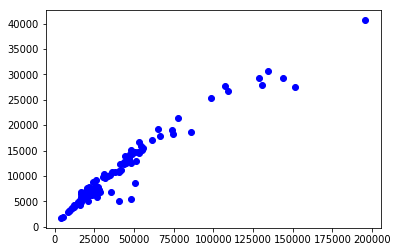

In [91]:
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo")

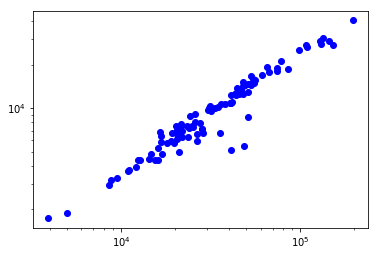

In [92]:
plt.loglog(stats.length, stats.unique, "bo")

In [93]:
stats[stats.language =="English"]

,language,author,title,length,unique
96,English,Shakespeare,Othello,26590,5898
97,English,Shakespeare,Romeo and Juliet,40776,5118
98,English,Shakespeare,A Midsummer Night's Dream,16103,4345
99,English,Shakespeare,The Merchant of Venice,20949,4978
100,English,Shakespeare,Macbeth,16874,4780
101,English,Shakespeare,Richard III,48315,5449
102,English,Shakespeare,Hamlet,28551,6776


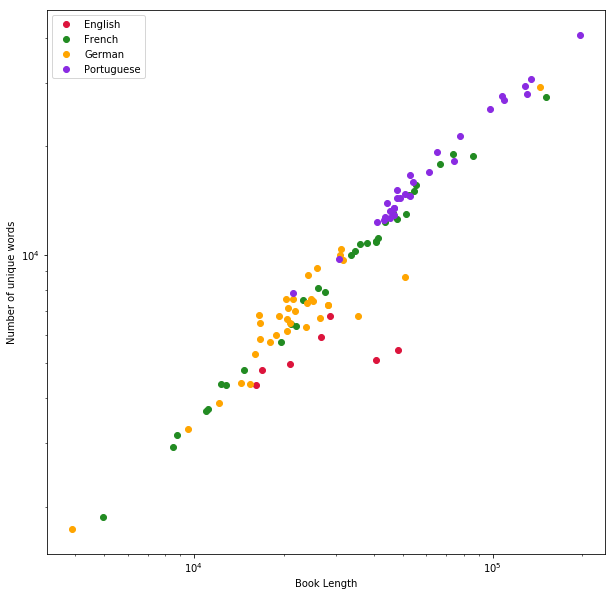

In [97]:
plt.figure(figsize = (10, 10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label="English", color="crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label="French", color="forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label="German", color="orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label="Portuguese", color="blueviolet")

plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of unique words")
plt.savefig("lang_plot.pdf")

In [103]:
stats["length"]

1      134382
2      130834
3      109270
4       44293
5      195771
6      107303
7       21440
8       77627
9       52982
10      98218
11     128630
12      65225
13      41175
14      47739
15      54151
16      43445
17      45461
18      45182
19      46709
20      48889
21      48022
22      52996
23      50751
24      61473
25      46751
26      46927
27      43575
28      74446
29      30567
30      40688
        ...  
73      23660
74      28148
75      28155
76      23863
77      12143
78      20484
79     143699
80       9535
81      25106
82      24701
83      21040
84      16651
85      21802
86      18855
87      16032
88      17912
89      20311
90      16568
91      19311
92      16648
93      25888
94      31635
95      20600
96      26590
97      40776
98      16103
99      20949
100     16874
101     48315
102     28551
Name: length, Length: 102, dtype: object